In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Algerian Forest Fires/Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.drop(['month','day','year'],axis=1,inplace=True)

In [ ]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,100
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,105


In [ ]:
# Independent & Dependent Features
X = df.drop('FWI',axis = 1)
y = df['FWI']

In [ ]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [ ]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
237,6.5
238,0.0
239,0.2
240,0.7


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

<Axes: >

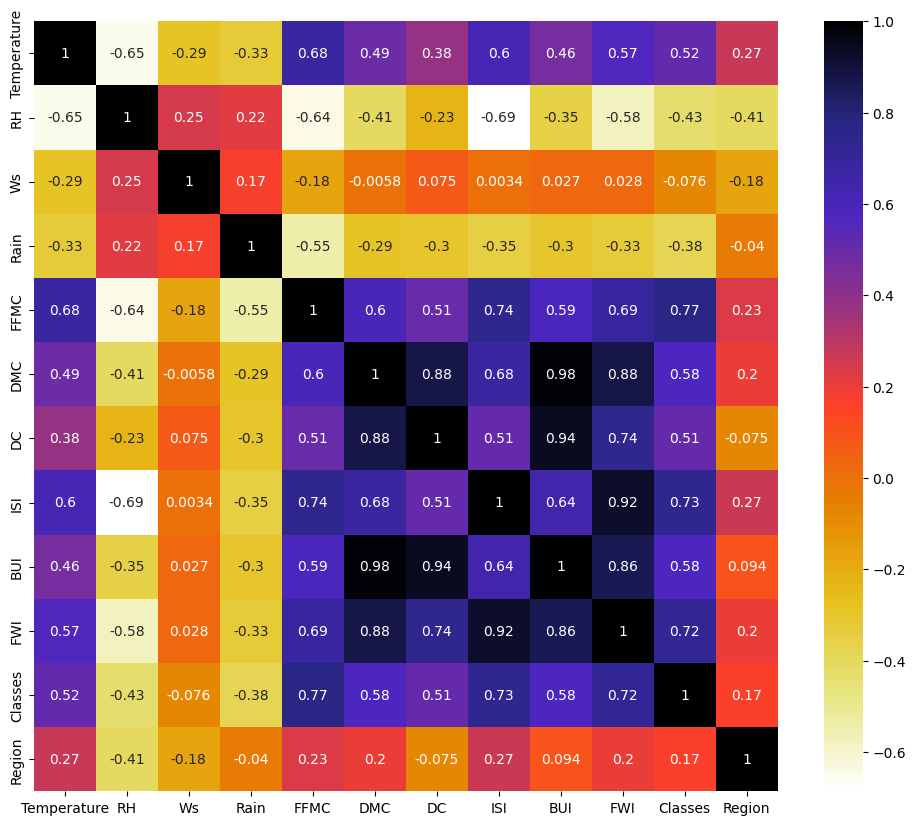

In [ ]:
# Feature Selection based on Correlation
## Check for Multicollinearity - Ridge Regression
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
# Threshold - should be set by the Domain Expert
corr_features = correlation(X_train,0.87)

In [ ]:
# Drop Features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
X_train.shape,X_test.shape

((181, 9), (61, 9))

## Feature Scaling or Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

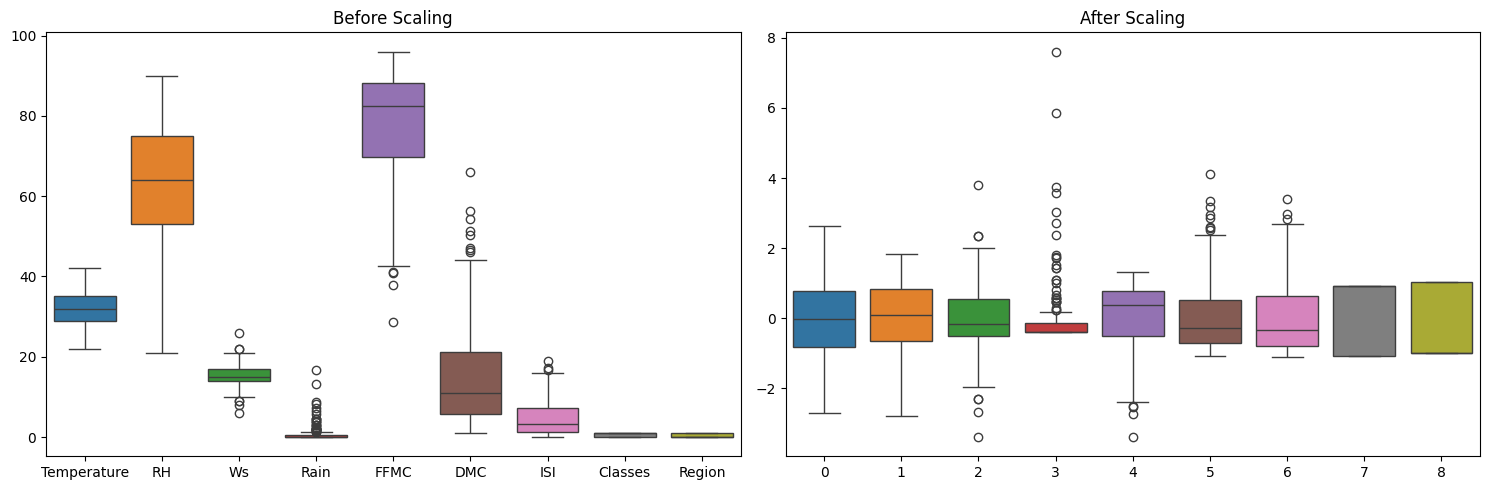

In [ ]:
# See the Outliers of the scaled data
fig, axes = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(ax = axes[0],data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(ax=axes[1],data=X_train_scaled)
plt.title('After Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Importing necessary metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Linear Regression Model

MAE: 32.86525174026157
R2: -40.88439899735745


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted')

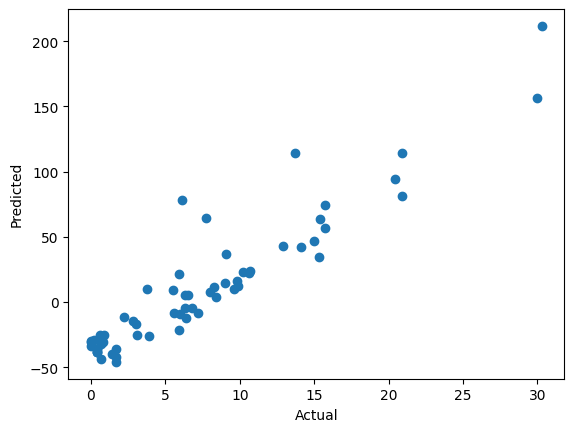

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Lasso Regression Model

MAE: 65.25587759909162
R2: -118.23635392199061


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted')

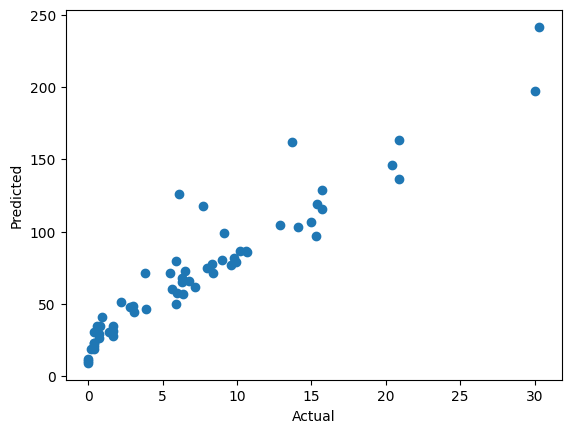

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Ridge Regression Model

MAE: 32.8973410601745
R2: -41.19757581061491


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted')

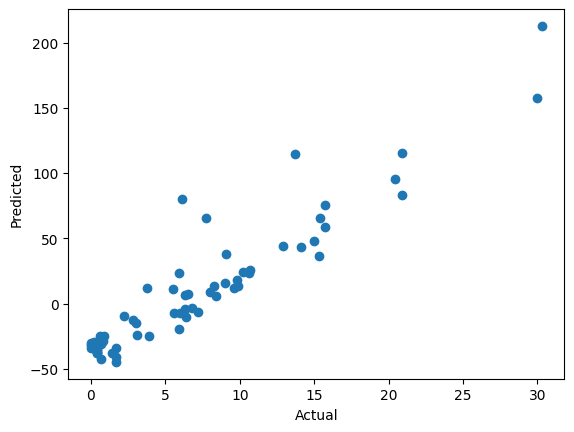

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Cross Validation Lasso

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train,y_train)

LassoCV(cv=5)

In [ ]:
lassocv.alpha_

0.48593435378678024

In [ ]:
len(lassocv.mse_path_)

100

MAE: 0.6869133919948954
R2: 0.9737146046555863


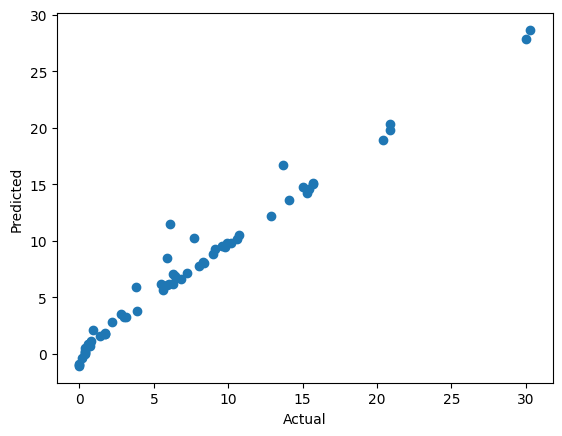

In [ ]:
y_pred = lassocv.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_test,y_pred)

# Ridge Regression CV

MAE: 0.856690888884327
R2: 0.9729928114396739


Text(0, 0.5, 'Predicted')

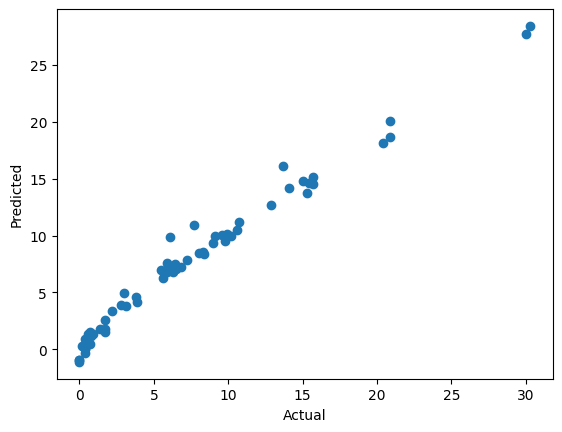

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
# To get which parameters have been used
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# ElasticNet Regression

MAE: 1.8915134363047041
R2: 0.8731354681001338


Text(0, 0.5, 'Predicted')

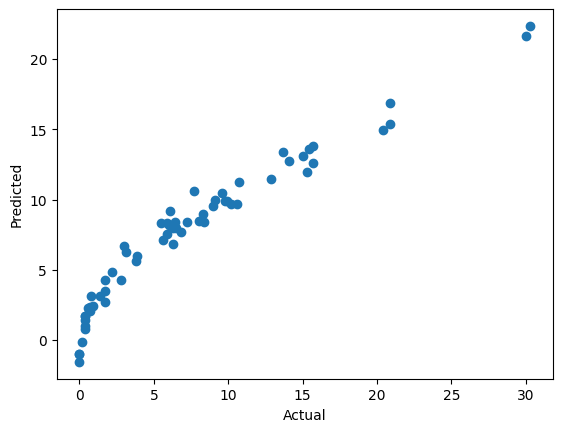

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred = elastic_net.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# ElasticNet CV

MAE: 0.7295307419548667
R2: 0.9789324233433637


Text(0, 0.5, 'Predicted')

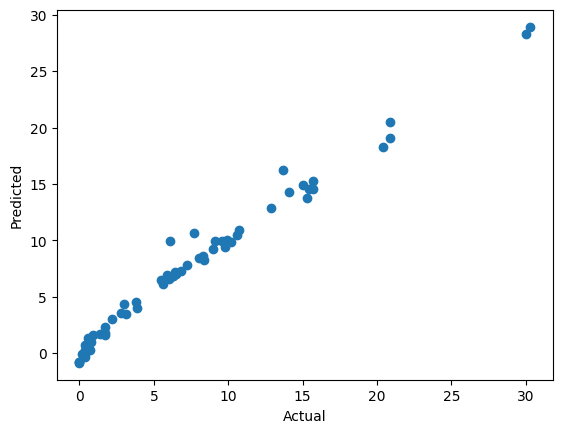

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV()
elastic_net_cv.fit(X_train_scaled,y_train)
y_pred = elastic_net_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
elastic_net_cv.alpha_

0.04551279724740584